Импортируем необходимые для анализа библиотеки

In [1]:
import numpy as np
import pandas as pd
import datetime
import dateutil

import matplotlib.pyplot as plt
%matplotlib inline

import seaborn as sns

#увеличим дефолтный размер графиков
from pylab import rcParams
rcParams['figure.figsize'] = 8, 5

Загрузим данные и посмотрим на размер датасета

In [2]:
data = pd.read_csv('JourneyA1000Miles.csv')
data.shape

(216, 12)

Имеем 216 строк и 12 столбцов. Посмотрим на первые 5 строк датасета.

In [3]:
data.head()

,Favorite,Activity Name,Activity Type,Start,Time,Distance,Elevation Gain,Avg Speed(Avg Pace),Max Speed(Best Pace),Avg HR,Max HR,Calories
0,false,Missoula Running,Running,"Fri, Mar 3, 2017 9:19 PM",1:09:06,5.04,65,13:43,5:09,NaN,NaN,627
1,false,Missoula Running,Running,"Thu, Mar 2, 2017 11:06 AM",1:09:01,5.04,74,13:42,5:22,NaN,NaN,676
2,false,Missoula Running,Running,"Tue, Feb 28, 2017 9:07 AM",1:43:38,7.09,130,14:37,7:29,NaN,NaN,833
3,false,Missoula Running,Running,"Sun, Feb 26, 2017 12:31 PM",2:27:20,9.03,179,16:19,3:03,NaN,NaN,"1,025"
4,false,Missoula Running,Running,"Fri, Feb 24, 2017 4:31 PM",1:13:17,5.04,53,14:32,7:21,NaN,NaN,610


Выведем названия столбцов

In [4]:
data.columns

Index([' Favorite', 'Activity Name', 'Activity Type', 'Start', 'Time',
       'Distance', 'Elevation Gain', 'Avg Speed(Avg Pace)',
       'Max Speed(Best Pace)', 'Avg HR', 'Max HR', 'Calories'],
      dtype='object')

Интуитивно столбцы значат следующее:\
'Favorite' - неизвестно\
'Activity Name' - название тренировки\
'Activity Type' - вид тренировки\
'Start' - дата и время начала тренировки\
'Time' - продолжительность тренировки\
'Distance' - дистанция преодоленная на тренировке, (миль)\
'Elevation Gain' - общий набор высоты за тренировку\
'Avg Speed (Avg Pace)' - средняя скорость, (миль/час)\
'Max Speed (Best Pace)' - максимальная скорость, (миль/час)\
'Avg HR' - средний пульс, (уд/мин)\
'Max HR' - максимальный пульс, (уд/мин)\
'Calories' - сожженные калории

Посмотрим каким типом данных представлены признаки в нашем датасете, а также есть ли пропущенные значения.

In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 216 entries, 0 to 215
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0    Favorite             216 non-null    object 
 1   Activity Name         216 non-null    object 
 2   Activity Type         216 non-null    object 
 3   Start                 216 non-null    object 
 4   Time                  216 non-null    object 
 5   Distance              216 non-null    float64
 6   Elevation Gain        189 non-null    object 
 7   Avg Speed(Avg Pace)   216 non-null    object 
 8   Max Speed(Best Pace)  216 non-null    object 
 9   Avg HR                16 non-null     float64
 10  Max HR                16 non-null     float64
 11  Calories              216 non-null    object 
dtypes: float64(3), object(9)
memory usage: 20.4+ KB


Видно, что признаки 'Distance', 'Avg HR' и 'Max HR' имеют тип 'float64', а остальные признаки 'object'. У признаков 'Avg HR' и 'Max HR' заполнено всего 16 строк, у 'Elevation Gain' 189 из 216 строк.

Посмотрим на количество уникальных значений признаков.

In [6]:
data.nunique(axis=0)

 Favorite                 1
Activity Name            31
Activity Type             2
Start                   214
Time                    210
Distance                137
Elevation Gain          135
Avg Speed(Avg Pace)     179
Max Speed(Best Pace)    162
Avg HR                    8
Max HR                   10
Calories                195
dtype: int64

У признака 'Favorite' всего 1 уникальное значение. Для дальнейшего исследования удалим из датасета признаки 'Favorite', 'Avg HR' и 'Max HR' как мало информативные.

In [7]:
data.drop([' Favorite', 'Avg HR', 'Max HR'], axis=1, inplace=True)

Посмотрим какие значения принимает признак 'Activity Type'

In [8]:
data['Activity Type'].value_counts()

Running    215
Cycling      1
Name: Activity Type, dtype: int64

Видно, что имеем 215 беговых тренировок и 1 тренировку на велосипеде. Удалим из датасета тренировку на веллсипеде.
После этого удалим из датасета признак 'Activity Type' как малоинформативный.

In [9]:
data.drop(data[data['Activity Type'] == 'Cycling'].index, inplace=True)
data.drop('Activity Type', axis=1, inplace=True)

Удалим из датасета тренировки, по которым часы не записали значения 'Elevation Gain', возможно, часы дали сбой.

In [10]:
data.drop(data[data['Elevation Gain'].notna() != True].index, inplace=True)

Посмотрим, что у нас получилось после очистки датасета от лишних значений.

In [11]:
data.head()

,Activity Name,Start,Time,Distance,Elevation Gain,Avg Speed(Avg Pace),Max Speed(Best Pace),Calories
0,Missoula Running,"Fri, Mar 3, 2017 9:19 PM",1:09:06,5.04,65,13:43,5:09,627
1,Missoula Running,"Thu, Mar 2, 2017 11:06 AM",1:09:01,5.04,74,13:42,5:22,676
2,Missoula Running,"Tue, Feb 28, 2017 9:07 AM",1:43:38,7.09,130,14:37,7:29,833
3,Missoula Running,"Sun, Feb 26, 2017 12:31 PM",2:27:20,9.03,179,16:19,3:03,"1,025"
4,Missoula Running,"Fri, Feb 24, 2017 4:31 PM",1:13:17,5.04,53,14:32,7:21,610


In [12]:
data.nunique(axis=0)

Activity Name            30
Start                   186
Time                    182
Distance                114
Elevation Gain          134
Avg Speed(Avg Pace)     158
Max Speed(Best Pace)    140
Calories                170
dtype: int64

In [13]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 188 entries, 0 to 215
Data columns (total 8 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Activity Name         188 non-null    object 
 1   Start                 188 non-null    object 
 2   Time                  188 non-null    object 
 3   Distance              188 non-null    float64
 4   Elevation Gain        188 non-null    object 
 5   Avg Speed(Avg Pace)   188 non-null    object 
 6   Max Speed(Best Pace)  188 non-null    object 
 7   Calories              188 non-null    object 
dtypes: float64(1), object(7)
memory usage: 13.2+ KB


In [14]:
data.shape

(188, 8)

Итак, мы имеем 188 записей о беговых тренировках, в которых все признаки заполнены.
Преобразуем значения признаков и добавим новые.

Преобразуем признак 'Start' из строкового в datetime формат

In [15]:
data['Start'] =  data['Start'].apply(lambda x: dateutil.parser.parse(x))

Создадим новый признак 'Weekday' и присвоим ему соответствующие значения

In [16]:
data['Weekday'] = pd.to_datetime(data['Start'])
data['Weekday'] = data['Weekday'].dt.dayofweek

Назовем значения соответствующими днями недели

In [17]:
days = {0:'Mon',1:'Tue',2:'Wed',3:'Thu',4:'Fri',5:'Sat',6:'Sun'}
data['Weekday'] = data['Weekday'].apply(lambda x: days[x])

Извлекем из признака "Start" месяц и год пробежки в отдельные признаки

In [18]:
data['Month'] = pd.DatetimeIndex(data['Start']).month
data['Year'] = pd.DatetimeIndex(data['Start']).year

Приведем признаки 'Distance' к типу данных float, а 'Elevation Gain' и 'Calories' к int.

In [19]:
data['Distance'] = data['Distance'].astype('float')
data['Elevation Gain'] = data['Elevation Gain'].str.replace(',', '').astype('int')
data['Calories'] = data['Calories'].str.replace(',', '').astype('int')

Приведем признаки 'Avg Speed(Avg Pace)' и 'Max Speed(Best Pace)' к значениям в секундах

In [20]:
def time_convert(x):
    m,s = map(int,x.split(':'))
    return m*60+s

data['Avg Speed(Avg Pace)'] = data['Avg Speed(Avg Pace)'].apply(time_convert)
data['Max Speed(Best Pace)'] = data['Max Speed(Best Pace)'].apply(time_convert)

Приведем признак 'Time' к значениям в минутах

In [21]:
def time_convert_to_min(x):
    if len(x) == 7:
        h,m,s = map(int,x.split(':'))
        return h*60+m
    if len(x) == 5:
        m,s = map(int,x.split(':'))
        return m
    
data['Time'] = data['Time'].apply(time_convert_to_min)

In [22]:
data.head()

,Activity Name,Start,Time,Distance,Elevation Gain,Avg Speed(Avg Pace),Max Speed(Best Pace),Calories,Weekday,Month,Year
0,Missoula Running,2017-03-03 21:19:00,69,5.04,65,823,309,627,Fri,3,2017
1,Missoula Running,2017-03-02 11:06:00,69,5.04,74,822,322,676,Thu,3,2017
2,Missoula Running,2017-02-28 09:07:00,103,7.09,130,877,449,833,Tue,2,2017
3,Missoula Running,2017-02-26 12:31:00,147,9.03,179,979,183,1025,Sun,2,2017
4,Missoula Running,2017-02-24 16:31:00,73,5.04,53,872,441,610,Fri,2,2017


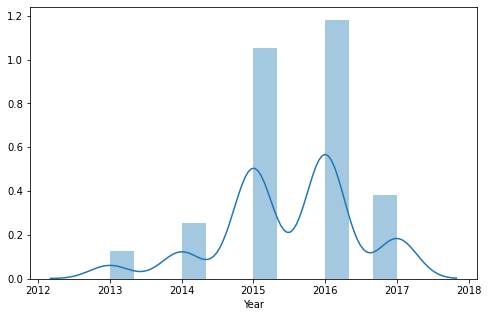

In [23]:
sns.distplot(data['Year']);

In [24]:
data.head()

,Activity Name,Start,Time,Distance,Elevation Gain,Avg Speed(Avg Pace),Max Speed(Best Pace),Calories,Weekday,Month,Year
0,Missoula Running,2017-03-03 21:19:00,69,5.04,65,823,309,627,Fri,3,2017
1,Missoula Running,2017-03-02 11:06:00,69,5.04,74,822,322,676,Thu,3,2017
2,Missoula Running,2017-02-28 09:07:00,103,7.09,130,877,449,833,Tue,2,2017
3,Missoula Running,2017-02-26 12:31:00,147,9.03,179,979,183,1025,Sun,2,2017
4,Missoula Running,2017-02-24 16:31:00,73,5.04,53,872,441,610,Fri,2,2017


Посмотрим на распледеление тренировок по месяцам в разрезе года

In [25]:
pd.crosstab(data['Month'], data['Year'], margins=True)

Year,2013,2014,2015,2016,2017,All
Month,,,,,,
1,0,0,0,0,7,7
2,0,0,2,0,15,17
3,0,0,9,3,2,14
4,0,1,8,5,0,14
5,0,3,12,16,0,31
6,8,5,10,10,0,33
7,0,2,8,8,0,18
8,0,0,7,3,0,10
9,0,2,10,14,0,26


Из таблицы видно следующее:\
Тренировки начались в 2013 году. Было проделано 8 тренировок и все они пришлись на июнь месяц.\
В 2014 году спортсмен начал тренироваться в апреле и занимался, за исключением августа до конца года. Всего за 2014 год проделал 16 тренировок.\
Основное число тренировок пришлось на 2015-2016 гг. по 66 и 74 соответственно.\
В 2017 году тренировочными были только первые три месяца, общее число занятий составило 24.

Посмотрим на графике распределение тренировок по годам

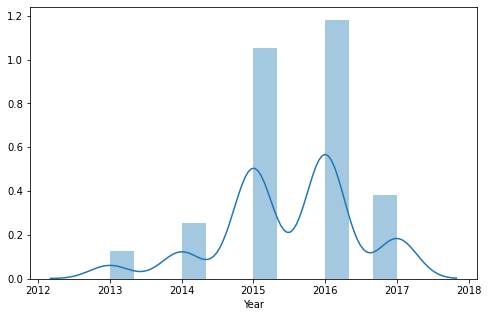

In [26]:
sns.distplot(data['Year']);

Посмотрим наглядно на распредление тренировок по месяцам

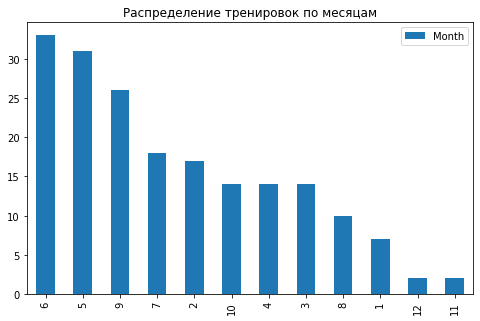

In [27]:
data['Month'].value_counts().plot(kind='bar', label='Month')
plt.legend()
plt.title('Распределение тренировок по месяцам');

Самое большое количество тренировок пришлось на три месяца (25 и более): июнь, май и сентябрь.

Посмотрим на распределение тренировок по дням недели

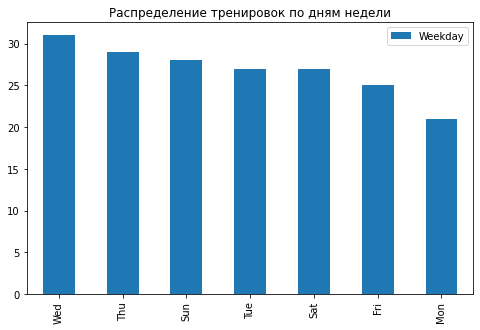

In [28]:
data['Weekday'].value_counts().plot(kind='bar', label='Weekday')
plt.legend()
plt.title('Распределение тренировок по дням недели');

Здесь не видно какой-либо закономерности, тренировки распределены достаточно равномерно.

Посмотрим на средние значения и медиану числовых признаков

In [29]:
columns_to_show = ['Time', 'Distance', 'Elevation Gain', 'Avg Speed(Avg Pace)', 'Calories']

data.groupby(['Year'])[columns_to_show].agg([np.mean, np.median])

Time         Distance        Elevation Gain         \
            mean median      mean median           mean median   
Year                                                             
2013  135.125000   89.5  4.236250  4.295     209.125000  108.0   
2014   89.250000   77.5  5.186875  4.850     785.812500  871.5   
2015   70.121212   57.5  5.644697  5.090     212.500000   71.0   
2016  111.121622   97.5  8.186622  8.000     448.405405  157.5   
2017   79.291667   72.0  5.788750  5.045      90.041667   77.0   

     Avg Speed(Avg Pace)             Calories          
                    mean  median         mean  median  
Year                                                   
2013         1722.875000  1679.0   500.250000   465.5  
2014          987.125000   964.5   656.625000   608.0  
2015          738.606061   678.5   769.363636   713.0  
2016          809.554054   781.0  1102.729730  1083.0  
2017          821.666667   818.5   747.375000   679.5

Отобразим на графиках по отдельности

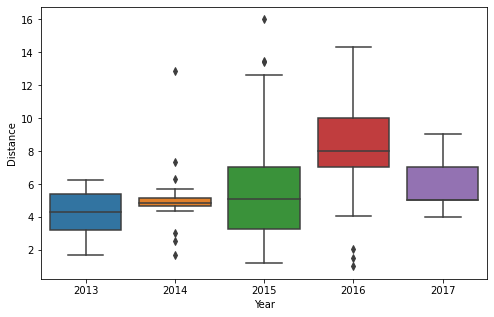

In [30]:
sns.boxplot(y="Distance", x="Year", data=data);

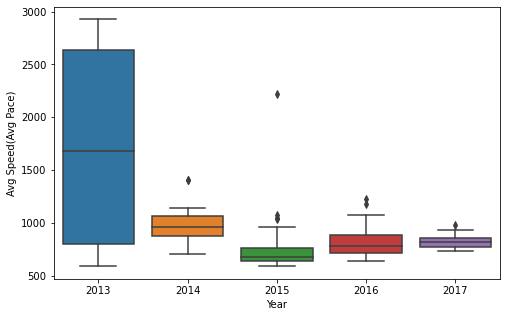

In [31]:
sns.boxplot(y="Avg Speed(Avg Pace)", x="Year", data=data);

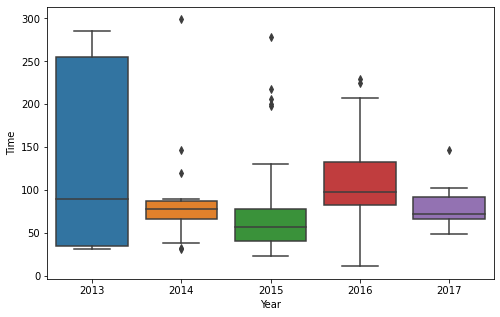

In [32]:
sns.boxplot(y="Time", x="Year", data=data);

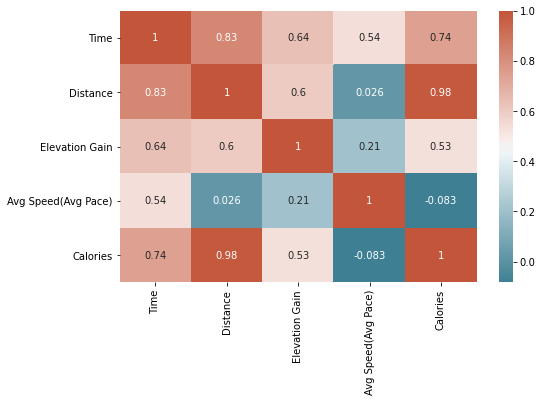

In [33]:
corr = data[['Time', 'Distance', 'Elevation Gain', 'Avg Speed(Avg Pace)', 'Calories']].corr()
sns.heatmap(corr, xticklabels=corr.columns, yticklabels=corr.columns, annot=True,\
            cmap=sns.diverging_palette(220, 20, as_cmap=True));